The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Gráfico salvo como 'Images/WindSpeed.eps'


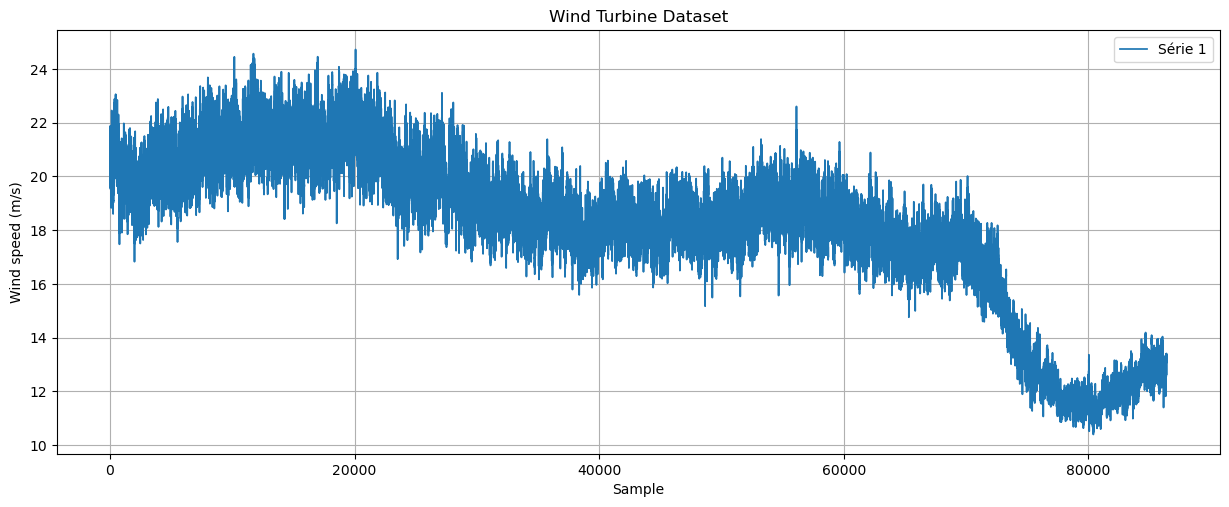

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from importlib import reload
from scipy.integrate import solve_ivp
import math
#from Aerodynamics import *
#from TorqueController import *
from _GraphUtils import *

params = {
    
    'ALPHA' : 0.1,
    'ALPHA_gc' : 50,
    'Area' :  math.pi * (57.5**2),
    'B_dt' : 755.49,
    'B_r' : 0,
    'B_g' : 0,
    'CP_max' : 0.486,
    'D_max' : 1000,
    'ETA_dt' : 1,
    'ETA_gc' : 1,
    'H' : 81,
    'J_r' : 55*1e6,
    'J_g' : 55*1e6,
    'K_dt' : 2.7*1e9,
    'K_opt' : 1.2171,
    'K_i' : 1,
    'K_p' : 4,
    'LAMBDA_opt' : 7.6,
    'N_g' : 1,
    'OMEGAn' : 11.11,
    'OMEGA_nom' : 7,
    'OMEGA_var' : 15,
    'PI' : np.pi,
    'PHI_opt' : 0,
    'P_r' : 2.25*1e7,
    'r_0' : 1.5,
    'R' : 57.5,
    'RHO' : 1.225,
    'ZETA' : 0.6,

    #'' : ,

}

path = r'Datasets/WindSpeed_V1.csv'
df = pd.read_csv(path)  
v = df.iloc[:,0].values + 1
v = np.sqrt(np.flip(v) )*4*1.5

PlotSeries(y_arrays=[v[:]],w=15,h=5.5,yname=r'Wind speed (m/s)', xname='Sample', title='Wind Turbine Dataset',pltly=False, file_name=r'Images/WindSpeed.eps',save=True,lw=1.25)

In [63]:
""" class HAWT:
    def __init__(self, **params):

        self.params = params
        
        self.ALPHA = params['ALPHA']
        self.ALPHA_gc = params['ALPHA_gc']
        self.Area = params['Area']
        self.B_dt = params['B_dt']
        self.B_r = params['B_r']
        self.B_g = params['B_g']
        self.CP_max = params['CP_max']
        self.D_max = params['D_max']
        self.ETA_dt = params['ETA_dt']
        self.ETA_gc = params['ETA_gc']
        self.H = params['H']
        self.J_r = params['J_r']
        self.J_g = params['J_g']
        self.K_dt = params['K_dt']
        self.K_opt = params['K_opt']
        self.K_i = params['K_i']
        self.K_p = params['K_p']
        self.LAMBDA_opt = params['LAMBDA_opt']
        self.N_g = params['N_g']
        self.OMEGAn = params['OMEGAn']
        self.OMEGA_nom = params['OMEGA_nom']
        self.OMEGA_var = params['OMEGA_var']
        self.PI = params['PI']
        self.PHI_opt = params['PHI_opt']
        self.P_r = params['P_r']
        self.r_0 = params['r_0']
        self.R = params['R']
        self.RHO = params['RHO']
        self.ZETA = params['ZETA']


        self.Pg = np.array([])
        self.Pd = np.array([])
        self.Eg = np.array([])
        self.Ed = np.array([])
        self.TAU_r = np.array([])
        self.TAU_g = np.array([])
        self.OMEGA_r = np.array([])
        self.OMEGA_g = np.array([])
        self.THETA_ts = np.array([])
        self.dOMEGA_r = np.array([])
        self.dOMEGA_g = np.array([])
        self.dTHETA_ts = np.array([])

    def Vws(self, Vm=10):
        
        return  """

" class HAWT:\n    def __init__(self, **params):\n\n        self.params = params\n        \n        self.ALPHA = params['ALPHA']\n        self.ALPHA_gc = params['ALPHA_gc']\n        self.Area = params['Area']\n        self.B_dt = params['B_dt']\n        self.B_r = params['B_r']\n        self.B_g = params['B_g']\n        self.CP_max = params['CP_max']\n        self.D_max = params['D_max']\n        self.ETA_dt = params['ETA_dt']\n        self.ETA_gc = params['ETA_gc']\n        self.H = params['H']\n        self.J_r = params['J_r']\n        self.J_g = params['J_g']\n        self.K_dt = params['K_dt']\n        self.K_opt = params['K_opt']\n        self.K_i = params['K_i']\n        self.K_p = params['K_p']\n        self.LAMBDA_opt = params['LAMBDA_opt']\n        self.N_g = params['N_g']\n        self.OMEGAn = params['OMEGAn']\n        self.OMEGA_nom = params['OMEGA_nom']\n        self.OMEGA_var = params['OMEGA_var']\n        self.PI = params['PI']\n        self.PHI_opt = params['PHI_opt']\n

In [ ]:
import numpy as np
import pandas as pd
from scipy.integrate import solve_ivp

def Cp_calc(LAMBDA=0, PHI=0):
    path = r'Datasets/Cp_X_lambda.csv'
    df = pd.read_csv(path)
    dist = np.abs(df['lambda'].values - LAMBDA)

    return (df['cp'].values[np.argmin(dist)])

class HAWT:
    def __init__(self, **params):

        self.Area =params['Area']
        self.B_dt =params['B_dt']
        self.B_r =params['B_r']
        self.B_g =params['B_g']
        self.CP_max =params['CP_max']
        self.ETA_dt =params['ETA_dt']
        self.ETA_gc =params['ETA_gc']
        self.J_r =params['J_r']
        self.J_g =params['J_g']
        self.K_dt =params['K_dt']
        self.K_opt =params['K_opt']
        self.LAMBDA_opt =params['LAMBDA_opt']
        self.N_g =params['N_g']
        self.OMEGA_nom =params['OMEGA_nom']
        self.PHI_opt = params['PHI_opt']
        self.P_r =params['P_r']
        self.R =params['R']
        self.RHO =params['RHO']
        

        self.X  = np.array([0,0,0])
        self.dX = np.array([0,0,0])     
        self.P_g = np.array([])  
        self.P_d = np.array([]) 
        self.OMEGA_g = np.array([])  
        self.mode = np.array([])     
        self.ctrl_mode = 'mode1'

    def set_state(self, X):
        self.X = X.flatten()

    def Calculate_TAU_g(self, OMEGA_g, u_k=0, PHI=None):
        
        Area = self.Area
        ETA_gc = self.ETA_gc
        LAMBDA = self.LAMBDA_opt + u_k
        OMEGA_nom = self.OMEGA_nom
        P_r = self.P_r
        R = self.R
        RHO = self.RHO

        if PHI == None:
            PHI = self.PHI_opt
        
        C_p = Cp_calc(LAMBDA)
        K_mppt = RHO*Area*(R**3)*C_p/(2*(LAMBDA**3))
        TAU = K_mppt*(OMEGA_g**2)
        P_g = ETA_gc*OMEGA_g*TAU
        if P_g >= P_r or OMEGA_g >= OMEGA_nom:
            
        self.K_mppt = K_mppt
        self.TAU = TAU
        return TAU
    
    def Calculate_TAU_r(self, OMEGA_r, v, PHI=None):
        
        Area = self.Area
        R = self.R
        RHO = self.RHO
        if PHI == None:
            PHI = self.PHI_opt
        
        LAMBDA = OMEGA_r*R/v
        C_p = Cp_calc(LAMBDA)
        TAU = RHO*Area*C_p*(v**3)/(2*OMEGA_r)
        return TAU

    def dynamics(self, t, X, U):

        B_dt = self.B_dt 
        B_r = self.B_r
        B_g = self.B_g
        ETA_dt = self.ETA_dt
        K_dt = self.K_dt 
        J_r = self.J_r 
        J_g = self.J_g
        N_g = self.N_g
        
        A=np.array([[        -(B_dt+B_r)/J_r,                          B_dt/(N_g*J_r),                -K_dt/J_r],
                    [(B_dt*ETA_dt)/(N_g*J_g), -(((B_dt*ETA_dt)/(N_g**2))+B_g)*(1/J_g),  (K_dt*ETA_dt)/(N_g*J_g)],
                    [                      1,                                  -1/N_g,                        0]])
        
        B = np.array([[1/J_r,      0],
                      [    0, -1/J_g],
                      [    0,      0]])
        
        dX = (A@X.reshape(-1,1))+(B@U.reshape(-1,1))
        self.dX = dX.flatten()
        return dX.flatten()
    
    def compute_input(self, X, v, u_k=0):
        
        OMEGA_r, OMEGA_g = X[0], X[1]
        TAU_r = self.Calculate_TAU_r(OMEGA_r, v, PHI=0)
        TAU_g = self.Calculate_TAU_g(OMEGA_g, u_k, PHI=0)

        du = np.array([TAU_r,TAU_g])
        self.U = du
        
        return du
    
    def iterate(self, u, dt):
        #DOP853
        sol = solve_ivp(self.dynamics, [0, dt], self.X, 
            args=(u.flatten(),), method="RK23", t_eval=[dt])
        self.X = sol.y[:, -1]
        return self.X
    
    def compute_output(self):
        X = self.X.reshape(1,-1)
        dX = self.dX.reshape(1,-1)
        B_dt = self.B_dt
        TAU_r, TAU_g = self.U
        OMEGA_r, OMEGA_g, _ = self.X

        P_g = TAU_g*OMEGA_g*self.ETA_gc
        P_d = self.B_dt*((OMEGA_r-OMEGA_g)**2)
        self.P_g = np.append(self.P_g,P_g)
        self.P_d = np.append(self.P_d,P_d)
        self.OMEGA_g = np.append(self.OMEGA_g,OMEGA_g)


    

In [65]:
hawt = HAWT(**params)

X=np.array([0.1,0.1,0])

hawt.set_state(X)

e = 20000
for i,v_ in enumerate(v[:]):
    #print(i,'/',len(v))
    #if i%5==0: clear_output(wait=False)
    U = hawt.compute_input(X,v=v_,u_k=0)
    X = hawt.iterate(U,1)
    hawt.compute_output()

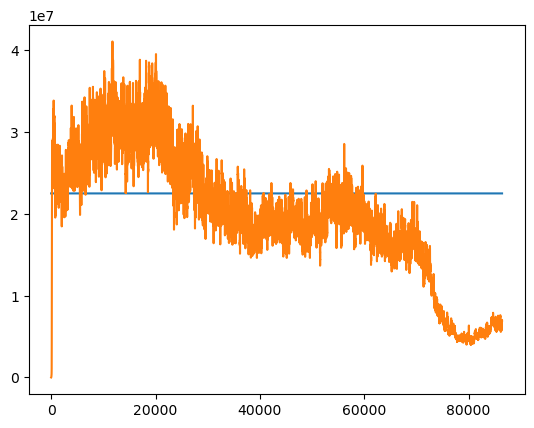

In [66]:
y = hawt.P_g
x = np.arange(len(y))
y2 = np.array([hawt.P_r for i in range(len(x))])
plt.plot(x,y2)
plt.plot(x,y)

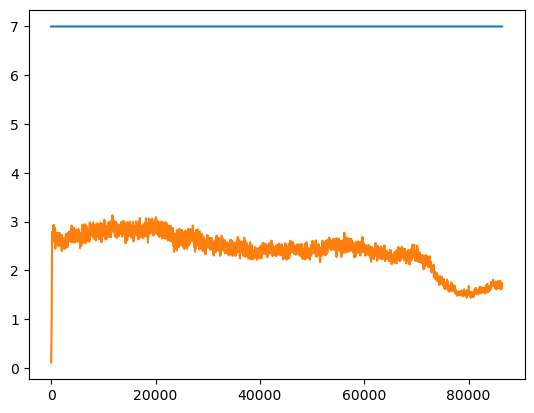

In [67]:
y = hawt.OMEGA_g
x = np.arange(len(y))
y2 = np.array([hawt.OMEGA_nom for i in range(len(x))])
plt.plot(x,y2)
plt.plot(x,y)